<a href="https://colab.research.google.com/github/tejaz10/embrio/blob/main/Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_path='/content/Cancer_data.csv'
df = pd.read_csv(data_path)
df.sample(6)

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
773,54,1,32.850816,0,0,5.203236,3.481107,0,1
173,45,0,18.034623,0,0,7.072283,4.654164,0,0
1345,79,0,31.366267,0,0,5.365782,2.469235,0,0
1189,66,1,28.612058,1,0,8.688011,0.399912,0,1
963,75,1,37.086619,0,2,8.059058,3.258399,0,1
756,31,0,38.293843,0,0,4.332509,0.201651,0,0


In [ ]:
df.shape

(1500, 9)

Text(0.5, 1.0, 'Diagnosis Frequency')

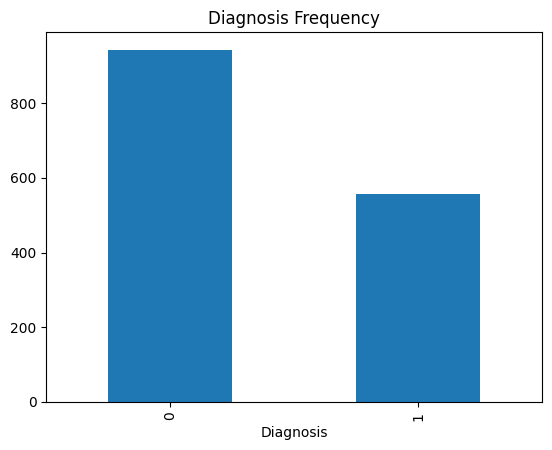

In [ ]:
(df['Diagnosis'].value_counts().plot(kind='bar')).set_title('Diagnosis Frequency')

In [ ]:
X = df.iloc[:, :8]
y = df['Diagnosis']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
X_test

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory
127,26,1,22.616978,0,1,5.270076,2.889385,0
528,70,1,20.969905,0,1,9.200382,3.047643,0
803,29,1,37.832174,0,2,9.314904,0.246368,1
1409,25,0,36.542273,0,0,4.047059,4.257422,0
727,55,1,30.016277,1,0,2.872577,3.711005,0
...,...,...,...,...,...,...,...,...
1255,49,0,39.003390,0,1,8.877515,4.960080,1
571,36,0,37.060409,0,0,7.254682,2.649169,0
663,39,0,35.122669,1,0,2.320786,3.803797,1
52,56,0,19.796683,0,0,3.525292,3.340097,0


In [ ]:
# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
ANN1 = models.Sequential([
    layers.Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32,activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(16,activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1,activation='sigmoid')
])

In [ ]:
ANN1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = ANN1.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8698 - loss: 0.3635 - val_accuracy: 0.8600 - val_loss: 0.3219
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8885 - loss: 0.3273 - val_accuracy: 0.8733 - val_loss: 0.3205
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8573 - loss: 0.3456 - val_accuracy: 0.8633 - val_loss: 0.3172
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8556 - loss: 0.3634 - val_accuracy: 0.8700 - val_loss: 0.3149
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8813 - loss: 0.3258 - val_accuracy: 0.8767 - val_loss: 0.3138
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8827 - loss: 0.3201 - val_accuracy: 0.8733 - val_loss: 0.3102
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8723 - loss: 0.3655 - val_accuracy: 0.8767 - val_loss: 0.3095
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8732 - loss: 0.3367 - val_accuracy: 0.87

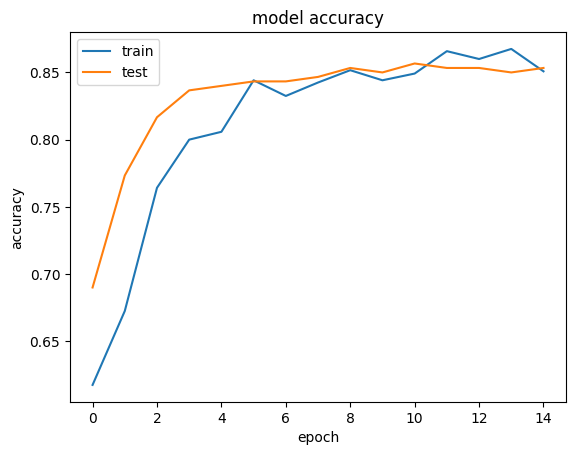

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')